In [35]:
import yoda
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['text.usetex'] = True
import numba as nb

In [36]:
hist_name='d01-x01-y01'
data_hist_path = os.path.join(os.getcwd(), 'rivet_histograms', 'data', 'ALEPH_1996_S3486095.yoda')
hist = yoda.read(data_hist_path)
hist_0=hist['/REF/ALEPH_1996_S3486095/d01-x01-y01']

In [37]:
hist_0.xVals()

array([0.0025, 0.0075, 0.0125, 0.0175, 0.0225, 0.0275, 0.0325, 0.0375,
       0.045 , 0.055 , 0.07  , 0.09  , 0.11  , 0.14  , 0.18  , 0.225 ,
       0.275 , 0.325 , 0.375 , 0.45  , 0.55  , 0.65  , 0.75  ])

In [38]:
def return_data_hist_yoda(hist_name='d01-x01-y01'):
    # print('data hist name = ', hist_name)
    data_hist_path = os.path.join(os.getcwd(), 'rivet_histograms', 'data', 'ALEPH_1996_S3486095.yoda')
    tree_name_data='/REF/ALEPH_1996_S3486095'
    yoda_file = yoda.read(data_hist_path)
    full_hist_name = '%s/%s' % (tree_name_data, hist_name)
    yoda_hist = yoda_file[full_hist_name]
    hist_edges = yoda_hist.xVals()
    hist_values = yoda_hist.yVals()
    hist_errs = yoda_hist.yErrs()[:,0]
    return hist_edges, hist_values, hist_errs

In [39]:
_, hist_data, hist_data_errs = return_data_hist_yoda(hist_name='d01-x01-y01')
hist_data_errs

array([0.4079216 , 0.254951  , 0.156205  , 0.1204159 , 0.1       ,
       0.09899495, 0.09404786, 0.08919641, 0.06933974, 0.05263079,
       0.0304795 , 0.02334524, 0.02267157, 0.01835756, 0.01520691,
       0.0127122 , 0.01024597, 0.00778267, 0.00619112, 0.00398246,
       0.00244131, 0.00148661, 0.00078102])

In [40]:
len(hist_data), len(hist_data_errs)

(23, 23)

In [41]:
def return_simulation_hist_yoda(filename = 'ALEPH_1996_S3486095_card_0.yoda', hist_name='d01-x01-y01'):
    # print('simulation hist name = ', hist_name)
    simulation_hist_path = os.path.join(os.getcwd(), 'rivet_histograms', 'simulation', filename)
    yoda_file = yoda.read(simulation_hist_path)
    tree_name_simulation='/ALEPH_1996_S3486095'
    
    full_hist_name = '%s/%s' % (tree_name_simulation, hist_name)
    yoda_hist = yoda_file[full_hist_name]
    hist_edges = yoda_hist.xVals()
    hist_values = yoda_hist.yVals()
    hist_errs = yoda_hist.yErrs()
    return hist_edges, hist_values, hist_errs

In [42]:
_, hist1_simulation, hist1_simulation_errs = return_simulation_hist_yoda(filename = 'ALEPH_1996_S3486095_card_0.yoda', hist_name='d01-x01-y01')
hist1_simulation

array([ 9.207162  , 28.6445    , 18.925832  , 15.856778  , 10.23018   ,
       18.414322  , 10.741688  ,  7.161126  ,  4.092072  ,  5.882353  ,
        2.813299  ,  2.4296675 ,  1.534527  ,  1.2787725 ,  0.95907925,
        0.7672634 ,  0.3069054 ,  0.0511509 ,  0.0511509 ,  0.07672634,
        0.07672634,  0.0511509 ,  0.        ])

In [58]:
def return_simulation_hist_yoda_newseeds(filename = 'ALEPH_1996_S3486095_card_0.yoda', hist_name='d01-x01-y01'):
    # print('simulation hist name = ', hist_name)
    simulation_hist_path = os.path.join(os.getcwd(), 'rivet_histograms', 'simulation', 'newseeds', filename)
    yoda_file = yoda.read(simulation_hist_path)
    tree_name_simulation='/ALEPH_1996_S3486095'
    
    full_hist_name = '%s/%s' % (tree_name_simulation, hist_name)
    yoda_hist = yoda_file[full_hist_name]
    hist_edges = yoda_hist.xVals()
    hist_values = yoda_hist.yVals()
    hist_errs = yoda_hist.yErrs()
    return hist_edges, hist_values, hist_errs

In [63]:
_, hist1_simulation_newseeds, hist1_simulation_errs_newseeds = return_simulation_hist_yoda_newseeds(filename = 'ALEPH_1996_S3486095_card_0.yoda', hist_name='d01-x01-y01')
hist1_simulation_newseeds

ReadError: Reading from filename /home/ali/Desktop/Pulled_Github_Repositories/Pythia8_SBI_Tune/code/rivet_histograms/simulation/newseeds/ALEPH_1996_S3486095_card_0.yoda failed

In [62]:
len(hist1_simulation_errs) ,len(hist1_simulation)

(23, 23)

In [43]:
def get_hist_names():
    hist_names=[]
    for i in range(1,43):
        hist_names.append('d{:02d}-x01-y01'.format(i) )
        #13-16 and 24 not present in yoda files
    hist_names.remove('d13-x01-y01')
    hist_names.remove('d14-x01-y01')
    hist_names.remove('d15-x01-y01')
    hist_names.remove('d16-x01-y01')
    hist_names.remove('d24-x01-y01')
    # d25-x01-y01 gives error of unequal lengths
    # hist_names.remove('d25-x01-y01')
    # hist_names.remove('d26-x01-y01')
    # hist_names.remove('d27-x01-y01')
    #19-23 are empty
    hist_names.remove('d19-x01-y01')
    hist_names.remove('d20-x01-y01')
    hist_names.remove('d21-x01-y01')
    hist_names.remove('d22-x01-y01')
    hist_names.remove('d23-x01-y01')
    #36 gives a huge chi2 (=10^18) for unknown reason
    hist_names.remove('d36-x01-y01')
    # 41
    hist_names.remove('d41-x01-y01')
    hist_names.remove('d42-x01-y01')

    return hist_names

In [44]:
print(get_hist_names())

['d01-x01-y01', 'd02-x01-y01', 'd03-x01-y01', 'd04-x01-y01', 'd05-x01-y01', 'd06-x01-y01', 'd07-x01-y01', 'd08-x01-y01', 'd09-x01-y01', 'd10-x01-y01', 'd11-x01-y01', 'd12-x01-y01', 'd17-x01-y01', 'd18-x01-y01', 'd25-x01-y01', 'd26-x01-y01', 'd27-x01-y01', 'd28-x01-y01', 'd29-x01-y01', 'd30-x01-y01', 'd31-x01-y01', 'd32-x01-y01', 'd33-x01-y01', 'd34-x01-y01', 'd35-x01-y01', 'd37-x01-y01', 'd38-x01-y01', 'd39-x01-y01', 'd40-x01-y01']


We will use the following goodness-of-fit measure

$$ \lambda(D;\theta) = \chi^2=\sum_{\mathcal{O}} \sqrt{ \frac{1}{|b| -1} \sum_{b \in \mathcal{O}}\left(\frac{\text{MC}_{(b)}\left(\theta_i\right)-\text{Data}_{(b)}}{\Delta_{\text{MC}, b}}\right)^2}$$

where $\text{MC}_{(b)}\left(\theta_i\right)$ denotes the MC prediction for observable $\mathcal{O}$ at bin $b$, which depends on the parameters $\theta_i = \{ a_i, b_i \}$, and $\Delta_{\text{MC} \ b}$ represents the error in the MC prediction in the bin $b$, and $|b|$ represents the number of bins in observable $\mathcal{O}$'s histogram.

In [45]:
@nb.njit
def chi2(data_hist, sim_hist, sim_errs, print_=True):
    assert len(data_hist) == len(sim_hist)
    select = sim_hist > 0.0
    hsim = sim_hist[select]
    hdat = data_hist[select]
    sim_errs = sim_errs[select]
    
    num = (hdat - hsim)**2
    den = sim_errs**2 
    
    chi_2 =(num/den).sum()
    chi_2_per_dof =chi_2/len(hdat) 


    chi2 = np.sqrt(chi_2_per_dof)

    
    if print_==True:
        print('scaled chi2 per dof = \t', chi2)
    return chi2


In [46]:
def overall_chi2_observed_pred(sim_yoda_file='ALEPH_1996_S3486095_card_0.yoda', print_=True):
    """ returns the chi2 between the actually observed data and the predicted simulation"""

    hist_names = get_hist_names()
    overall_chi2 = 0
    for hist_name in hist_names:
        data_hist_edges, data_hist, data_hist_errs = return_data_hist_yoda(hist_name=hist_name)
        simulation_hist_edges, simulation_hist, simulation_hist_errs = return_simulation_hist_yoda(filename =sim_yoda_file , hist_name=hist_name)
        chi2_ = chi2(data_hist,simulation_hist, simulation_hist_errs, print_=print_)
        overall_chi2 = overall_chi2 +chi2_

    if print_==True:
        print('overall chi2= ', overall_chi2)
    return overall_chi2

In [47]:
overall_chi2_observed_pred(sim_yoda_file='ALEPH_1996_S3486095_card_0.yoda')

scaled chi2 per dof = 	 1.5957005952975236
scaled chi2 per dof = 	 0.9585231047052085
scaled chi2 per dof = 	 0.9454380814088926
scaled chi2 per dof = 	 1.465180670745023
scaled chi2 per dof = 	 1.1536779431769677
scaled chi2 per dof = 	 1.0597564463517282
scaled chi2 per dof = 	 1.3680118600134503
scaled chi2 per dof = 	 1.451352560975341
scaled chi2 per dof = 	 1.773845318571487
scaled chi2 per dof = 	 2.1787056704396415
scaled chi2 per dof = 	 2.076389405102098
scaled chi2 per dof = 	 2.4080258190313417
scaled chi2 per dof = 	 1.7321140513748663
scaled chi2 per dof = 	 1.8458242832802918
scaled chi2 per dof = 	 2.055355458279952
scaled chi2 per dof = 	 1.2211556733603992
scaled chi2 per dof = 	 1.4947541787057321
scaled chi2 per dof = 	 2.286546174438888
scaled chi2 per dof = 	 1.2885110299390565
scaled chi2 per dof = 	 1.106379903394601
scaled chi2 per dof = 	 2.399578322489311
scaled chi2 per dof = 	 0.881548799306804
scaled chi2 per dof = 	 1.1583019055758863
scaled chi2 per dof 

44.24391202702751

In [48]:
def overall_chi2_shuffledpred_pred(sim_yoda_file='ALEPH_1996_S3486095_card_0.yoda', shuffled_sim_yoda_file = 'ALEPH_1996_S3486095_card_1.yoda',print_=True):
    """ returns the chi2 between the simulated prediction at point theta_i and the simulated prediction at a shuffled point theta_i^* """

    hist_names = get_hist_names()
    overall_chi2 = 0
    for hist_name in hist_names:
        data_hist_edges, data_hist, data_hist_errs = return_simulation_hist_yoda(filename =shuffled_sim_yoda_file , hist_name=hist_name)
        simulation_hist_edges, simulation_hist, simulation_hist_errs = return_simulation_hist_yoda(filename =sim_yoda_file , hist_name=hist_name)
        
        chi2_ = chi2(data_hist,simulation_hist, simulation_hist_errs, print_=print_)
        overall_chi2 = overall_chi2 +chi2_

    if print_==True:
        print('overall chi2= ', overall_chi2)
    return overall_chi2

In [32]:
overall_chi2_shuffledpred_pred()

scaled chi2 per dof = 	 1.4527681901026341
scaled chi2 per dof = 	 1.0612386747399922
scaled chi2 per dof = 	 0.9408538813885918
scaled chi2 per dof = 	 1.6814594807096783
scaled chi2 per dof = 	 1.0545566265606912
scaled chi2 per dof = 	 1.0797691266782472
scaled chi2 per dof = 	 1.3160028481013095
scaled chi2 per dof = 	 1.2704200472580975
scaled chi2 per dof = 	 1.5524764885046707
scaled chi2 per dof = 	 1.9127275856349013
scaled chi2 per dof = 	 1.7435438383421114
scaled chi2 per dof = 	 1.8925239574693595
scaled chi2 per dof = 	 1.5381911957895533
scaled chi2 per dof = 	 1.6700486312375054
scaled chi2 per dof = 	 1.5323119746630007
scaled chi2 per dof = 	 1.1231697301746575
scaled chi2 per dof = 	 1.5558971267502022
scaled chi2 per dof = 	 1.479872922098491
scaled chi2 per dof = 	 1.081138321242257
scaled chi2 per dof = 	 0.9718057056113034
scaled chi2 per dof = 	 3.310180173396256
scaled chi2 per dof = 	 1.0160729706981901
scaled chi2 per dof = 	 1.038572343229041
scaled chi2 per

38.72117446024846

In [17]:
def plt_sim_data_hist(ax, hist_name='d05-x01-y01', filename='ALEPH_1996_S3486095_card_0.yoda'):
    data_hist_0_edges, data_hist_0, data_hist_0_errs = return_data_hist_yoda(hist_name)
    simulation_hist_0_edges, simulation_hist_0, simulation_hist_errs = return_simulation_hist_yoda(filename = filename, hist_name=hist_name)
    ax.step(y=data_hist_0, x= data_hist_0_edges, label='data {}'.format( hist_name))
    ax.step(y=simulation_hist_0, x=simulation_hist_0_edges, label='simulation {}'.format(hist_name))
    # ax.errorbar(y=data_hist_0, x= data_hist_0_edges, yerr = data_hist_0_errs, marker = '+', markeredgecolor='black',label='data {}'.format( hist_name))
    # ax.errorbar(y=simulation_hist_0, x=simulation_hist_0_edges, yerr = simulation_hist_errs, marker='+',markeredgecolor='black', label='simulation {}'.format(hist_name))
    ax.legend()

# Plots using the first $(a,b)$ point

29


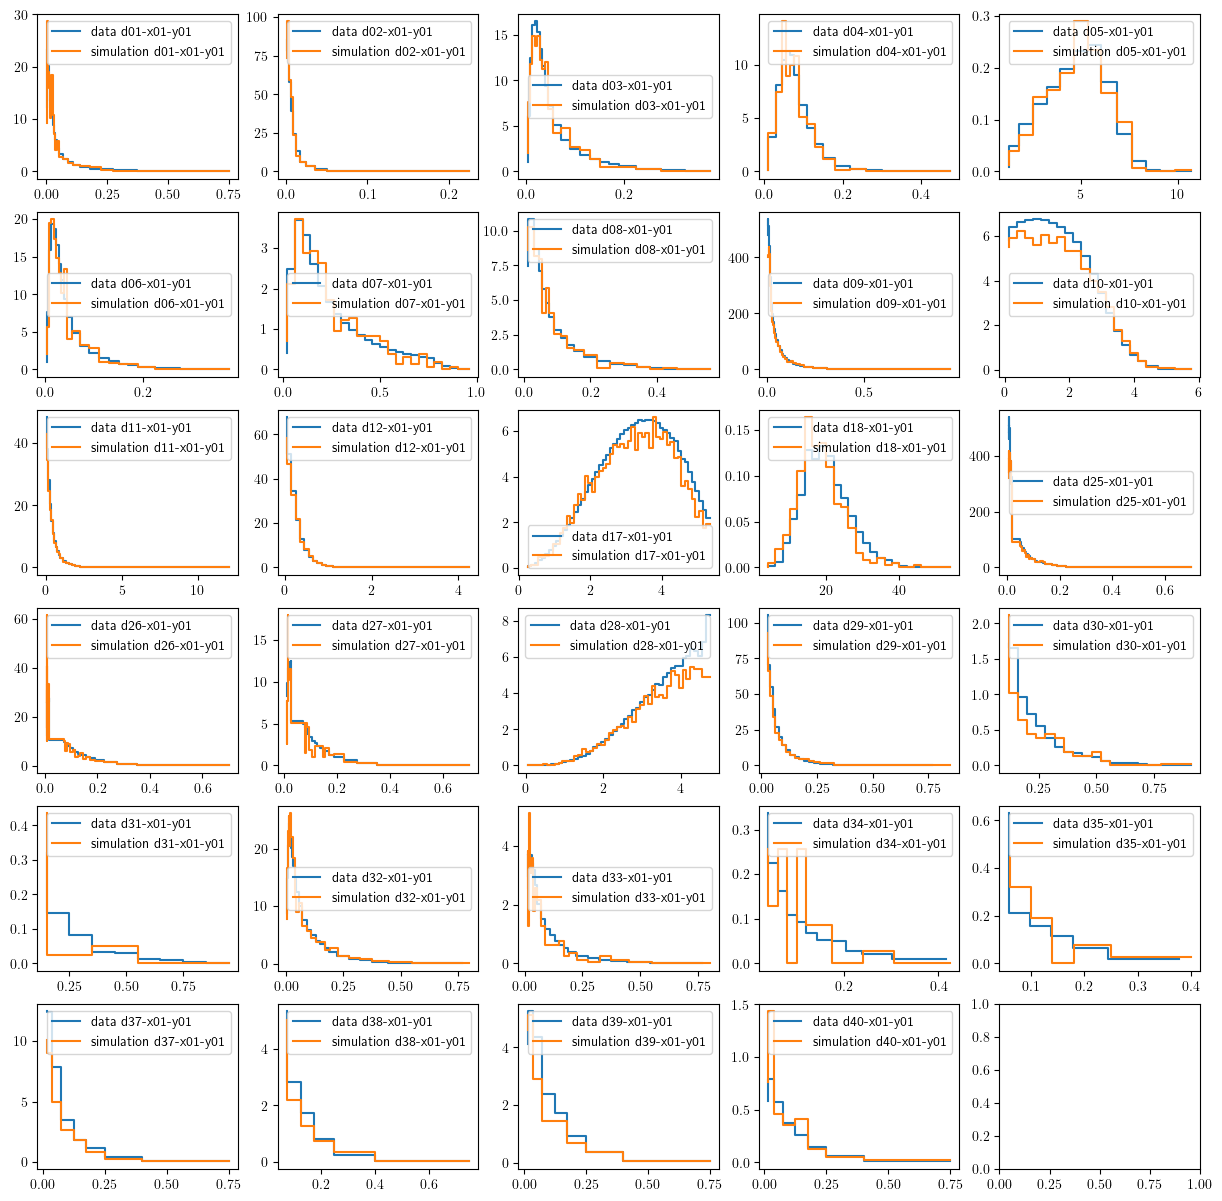

In [19]:
hist_names = get_hist_names()
print(len(hist_names))
nrows=6; ncols = 5
fig, ax = plt.subplots(nrows,ncols, figsize=(15,15), edgecolor='k')
ax = ax.ravel()
for hist_ind, hist_name in enumerate(hist_names):
    plt_sim_data_hist(ax=ax[hist_ind], hist_name=hist_name)

# Plots using a random $(a, b)$ point 

29


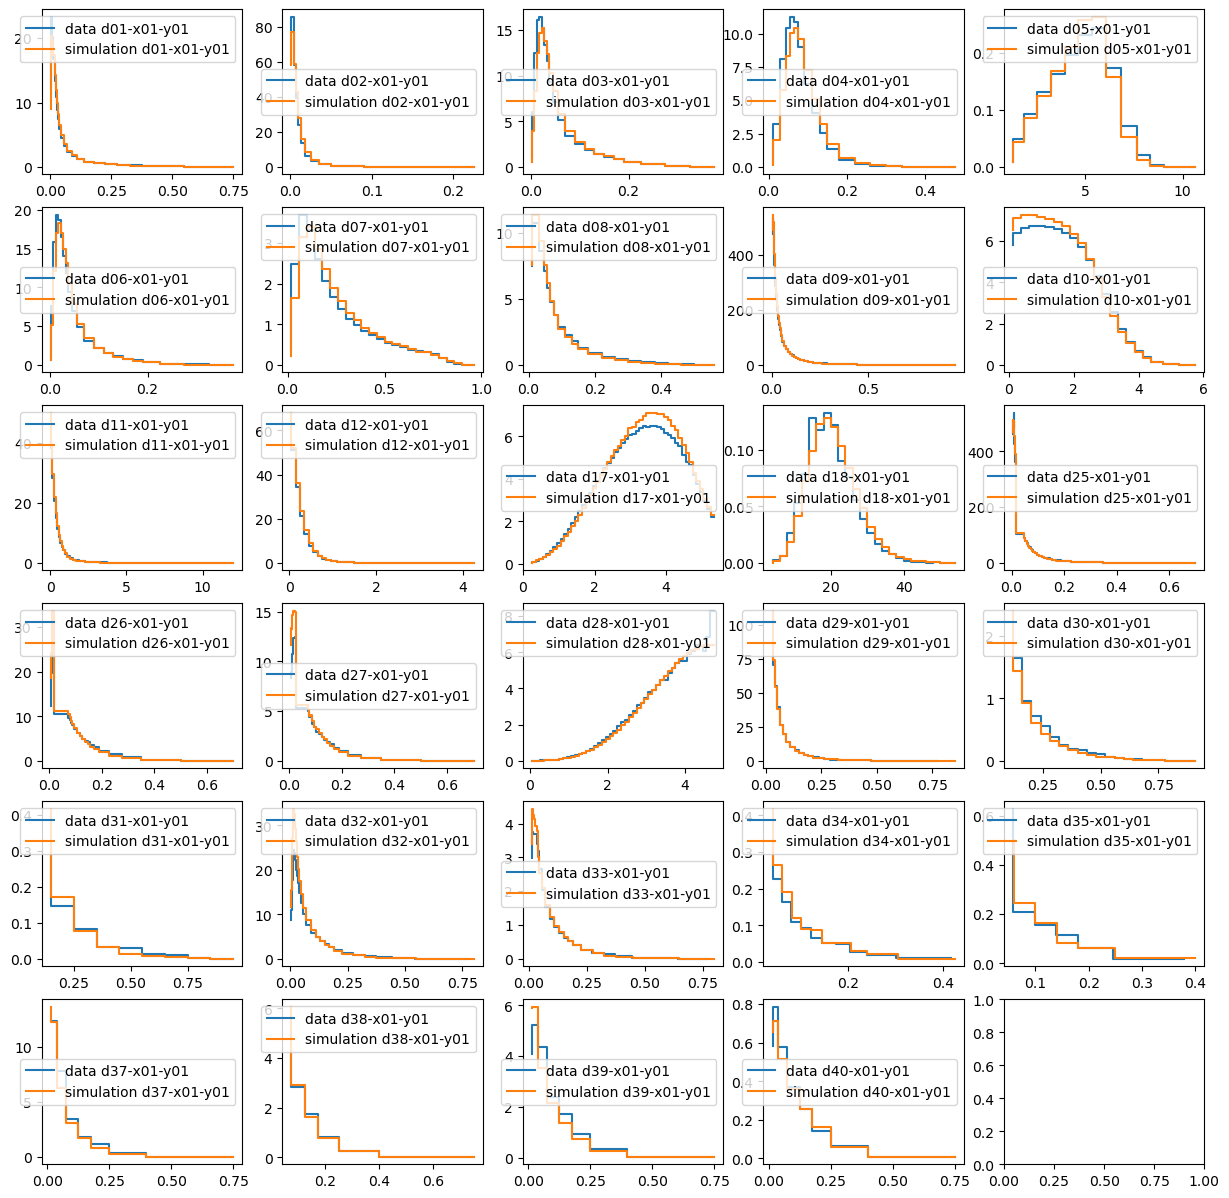

In [324]:
hist_names = get_hist_names()
print(len(hist_names))
nrows=6; ncols = 5
fig, ax = plt.subplots(nrows,ncols, figsize=(15,15), edgecolor='k')
ax = ax.ravel()
for hist_ind, hist_name in enumerate(hist_names):
    plt_sim_data_hist(ax=ax[hist_ind], hist_name=hist_name, filename='ALEPH_1996_S3486095_card_230.yoda')

In [20]:

def extract_numbers(s):
    import re
    
    return [int(x) if x.isdigit() else x for x in re.split('([0-9]+)', s)]

sim_files = os.listdir(os.path.join(os.getcwd(), 'rivet_histograms', 'simulation') )
sorted_list_files = sorted(sim_files, key = extract_numbers)
print(sorted_list_files[:10])

['ALEPH_1996_S3486095_card_0.yoda', 'ALEPH_1996_S3486095_card_1.yoda', 'ALEPH_1996_S3486095_card_2.yoda', 'ALEPH_1996_S3486095_card_3.yoda', 'ALEPH_1996_S3486095_card_4.yoda', 'ALEPH_1996_S3486095_card_5.yoda', 'ALEPH_1996_S3486095_card_6.yoda', 'ALEPH_1996_S3486095_card_7.yoda', 'ALEPH_1996_S3486095_card_8.yoda', 'ALEPH_1996_S3486095_card_9.yoda']


In [33]:
df = pd.read_csv(os.path.join(os.getcwd(), 'a_b_samples_uniform_1.csv'))[['a','b']]
df.head()

,a,b
0,0.890731,1.773921
1,1.306220,1.490305
2,1.653587,0.538929
3,0.666805,1.375998
4,1.105232,1.243956


## we need 3 test statistics
1. $\lambda_{\text{Observed, pred}}$ is between the actually observed (fixed) data and the prediction at $\theta_i$ 

$$ \lambda_{\text{Observed, pred}}(D;\theta_i)=\sum_{\mathcal{O}} \sqrt{ \frac{1}{|b|} \sum_{b \in \mathcal{O}}\left(\frac{\text{MC}_{(b)}\left(\theta_i\right)-\text{Data}_{(b)}}{\Delta_b}\right)^2}$$

where $\text{MC}_{(b)}\left(\theta_i\right)$ denotes the MC prediction for observable $\mathcal{O}$ at bin $b$, which depends on the parameters $\theta_i = \{ a_i, b_i \}$, and $\Delta_{\text{MC}, \ b}$ represents the error in the MC prediction in the bin $b$, and $|b|$ represents the number of bins in observable $\mathcal{O}$'s histogram. $\Delta_b = \sqrt{\Delta_{\text{Data}, \ b}^2 + \Delta_{\text{MC}, \ b}^2}$

2. $\lambda_{\text{simulated-observed, pred}}$ is between the prediction at $\theta_i$ and the prediction at a shuffled point $\theta^*$

$$ \lambda_{\text{simulated-observed, pred}}(\mathcal{D};\theta_i) =\sum_{\mathcal{O}} \sqrt{ \frac{1}{|b|} \sum_{b \in \mathcal{O}}\left(\frac{\text{MC}_{(b)}\left(\theta_i\right)-\text{MC}_{(b)}\left(\theta_i^*\right)}{\Delta_b}\right)^2}$$

where $\text{MC}_{(b)}\left(\theta_i^*\right)$ is the MC prediction at a shuffled parameter point $\theta^*$.

3. $\lambda_{\text{simulated, pred}}(\mathcal{D};\theta_i)$

$$ \lambda_{\text{simulated, pred}}(\mathcal{D};\theta_i)=\sum_{\mathcal{O}} \sqrt{ \frac{1}{|b|} \sum_{b \in \mathcal{O}}\left(\frac{\text{MC}_{(b)}\left(\theta_i\right)-\text{SimulatedData}_{(b)} (\theta_i)}{\Delta_b}\right)^2}$$

And need $Z_{1,3}$ (and $Z_{2,3}$ for ML modelling)

$$Z_{1,3} = \mathbb{1} \left[ \lambda_{\text{simulated, pred}}(\mathcal{D};\theta_i) \le \lambda_{\text{Observed, pred}}(D;\theta_i) \right] $$

$$Z_{2,3} = \mathbb{1} \left[ \lambda_{\text{simulated, pred}}(\mathcal{D};\theta_i) \le \lambda_{\text{simulated-observed, pred}}(\mathcal{D};\theta_i) \right] $$




In [54]:
def add_overall_observed_chi2(df, subsample=10):
    sim_files = os.listdir(os.path.join(os.getcwd(), 'rivet_histograms', 'simulation') )
    sorted_list_files = sorted(sim_files, key = extract_numbers)
    for rowind, row in df[:subsample].iterrows():
        df.loc[rowind, 'chi2_observed_pred'] = overall_chi2_observed_pred(sim_yoda_file = sorted_list_files[rowind], print_=False)

    return df

In [55]:
df_with_chi2_observed_pred = add_overall_observed_chi2(df)
df_with_chi2_observed_pred.head()

,a,b,chi2_observed_pred
0,0.890731,1.773921,44.243912
1,1.306220,1.490305,169.498032
2,1.653587,0.538929,543.161327
3,0.666805,1.375998,236.745043
4,1.105232,1.243956,165.107046


In [51]:
def add_shuffled_overall_chi2(df):
    import random
    sim_files = os.listdir(os.path.join(os.getcwd(), 'rivet_histograms', 'simulation') )
    sorted_list_files = sorted(sim_files, key = extract_numbers)
    shuffled_list_files = sorted_list_files[:]
    random.shuffle(shuffled_list_files)
    for rowind, row in df.iterrows():
        df.loc[rowind, 'chi2_shuffled'] = overall_chi2_shuffled(sim_yoda_file= sorted_list_files[rowind], shuffled_sim_yoda_file = shuffled_list_files[rowind],print_=False)

    return df

In [50]:
df_with_chi2.to_csv('a_b_chi2observed_1000.csv')

In [52]:
df_with_chi2_shuffled = add_shuffled_overall_chi2(df_with_chi2_observed_pred)
df_with_chi2_shuffled.head()

,a,b,chi2_observed,chi2_shuffled
0,0.890731,1.773921,44.243912,44.148846
1,1.306220,1.490305,169.498032,452.662911
2,1.653587,0.538929,543.161327,42.495750
3,0.666805,1.375998,236.745043,169.677849
4,1.105232,1.243956,165.107046,93.226767


In [53]:
cols=['a', 'b', 'chi2_shuffled', 'chi2_observed']
df_with_chi2_shuffled = df_with_chi2_shuffled[['a', 'b', 'chi2_shuffled', 'chi2_observed']]
df_with_chi2_shuffled.to_csv('a_b_chi2observed_chi2shuffled_1000.csv')

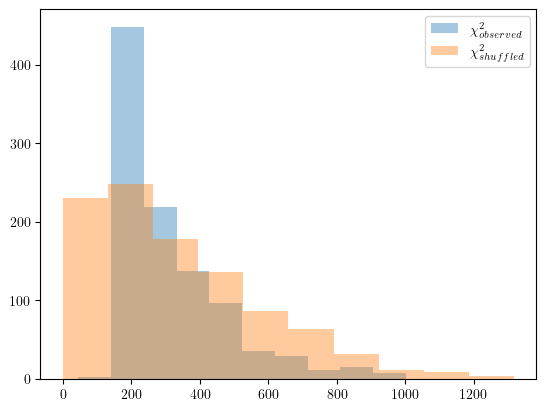

In [54]:
plt.hist(df_with_chi2_shuffled['chi2_observed'], label=r'$\chi^2_{observed}$', alpha=0.4)
plt.hist(df_with_chi2_shuffled['chi2_shuffled'], label=r'$\chi^2_{shuffled}$',alpha=0.4)
plt.legend()

In [66]:
def overall_chi2_single_point(sim_yoda_file='ALEPH_1996_S3486095_card_0.yoda', single_point_yoda_file='ALEPH_1996_S3486095_card_0.yoda',print_=True):
    """ over all histograms"""

    hist_names = get_hist_names()
    overall_chi2 = 0
    for hist_name in hist_names:
        simulation_hist_edges_point, simulation_hist_point, simulation_hist_errs_point = return_simulation_hist_yoda(filename =single_point_yoda_file , hist_name=hist_name)
        simulation_hist_edges, simulation_hist, simulation_hist_errs = return_simulation_hist_yoda(filename =sim_yoda_file , hist_name=hist_name)
        chi2_ = chi2(simulation_hist_point,simulation_hist, simulation_hist_errs, print_=print_)
        overall_chi2 = overall_chi2 +chi2_

    if print_==True:
        print('overall chi2= ', overall_chi2)
    return overall_chi2

In [67]:
def add_overall_chi2_single_point(df):
    sim_files = os.listdir(os.path.join(os.getcwd(), 'rivet_histograms', 'simulation') )
    sorted_list_files = sorted(sim_files, key = extract_numbers)
    for rowind, row in df.iterrows():
        df.loc[rowind, 'chi2_point_0'] = overall_chi2_single_point(sim_yoda_file = sorted_list_files[rowind], single_point_yoda_file='ALEPH_1996_S3486095_card_0.yoda',print_=False)

    return df

In [68]:
df_with_chi2_shuffled_single_point =add_overall_chi2_single_point(df_with_chi2_shuffled)

In [69]:
%%timeit
for rowind, row in df_with_chi2_shuffled_single_point.iterrows():
    df_with_chi2_shuffled_single_point.loc[rowind, 'Z_shuffled_observed'] = (row['chi2_shuffled'] <= row['chi2_observed']).astype(int)
    df_with_chi2_shuffled_single_point.loc[rowind, 'Z_shuffled_point0'] = (row['chi2_shuffled'] <= row['chi2_point_0']).astype(int)

262 ms ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
df_with_chi2_shuffled_single_point.describe()

,a,b,chi2_shuffled,chi2_observed,chi2_point_0,Z_shuffled_observed,Z_shuffled_point0
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.990061,1.093910,338.928240,311.278475,490.972263,0.497000,0.769000
std,0.572408,0.513808,245.832804,160.524892,184.109089,0.500241,0.421683
min,0.001196,0.200896,0.000000,44.243912,0.000000,0.000000,0.000000
25%,0.511282,0.654855,142.222506,189.455125,361.471970,0.000000,1.000000
50%,0.984827,1.089722,276.303389,250.785557,419.249029,0.000000,1.000000
75%,1.500206,1.521528,482.607825,384.414735,547.076538,1.000000,1.000000
max,1.999527,1.997974,1317.213927,1001.988784,1236.350505,1.000000,1.000000


In [71]:
df_with_chi2_shuffled_single_point.to_csv('a_b_chi2observed_chi2shuffled_Z_shuffled_observed_Z_shuffled_point0_1000.csv')